In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
import pickle

In [46]:
df_main = pd.read_csv("Churn_Modelling.csv")
df_main.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [47]:
df = df_main.copy()
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], axis=1)
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [48]:
label_encoder_gender = LabelEncoder()
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,0,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0
2,502,France,0,42,8,159660.80,3,1,0,113931.57,1
3,699,France,0,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0


In [49]:
# Create a OneHotEncoder object that will return a dense array (not sparse matrix)
ohe_geography = OneHotEncoder(sparse_output=False)
# Transform the 'Geography' column into one-hot encoded format
geo_encoder = ohe_geography.fit_transform(df[['Geography']])
# Display the one-hot encoded representation of the Geography column
geo_encoder

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [50]:
# Create a DataFrame from the one-hot encoded geography features
# - geo_encoder contains the encoded values
# - ohe_geography.get_feature_names_out() provides the column names for each encoded feature
# - Setting the index to match the original dataframe's index to maintain alignment
geo_encoded_df = pd.DataFrame(geo_encoder, columns=ohe_geography.get_feature_names_out(), index=df.index)
geo_encoded_df  # Display the resulting DataFrame with one-hot encoded geography features

,Geography_France,Geography_Germany,Geography_Spain
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,0.0,0.0,1.0
...,...,...,...
9995,1.0,0.0,0.0
9996,1.0,0.0,0.0
9997,1.0,0.0,0.0
9998,0.0,1.0,0.0


In [51]:
# Concatenate the original dataframe (excluding 'Geography' column) with the one-hot encoded geography dataframe
# This effectively replaces the categorical 'Geography' column with its one-hot encoded version
df = pd.concat([df.drop(columns=['Geography']), geo_encoded_df], axis=1)
df.head()  # Display the first 5 rows of the modified dataframe to verify the changes

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,1.0,0.0,0.0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.0,0.0,1.0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.0,0.0,0.0
3,699,0,39,1,0.00,2,0,0,93826.63,0,1.0,0.0,0.0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0.0,0.0,1.0


In [52]:
# Save the label encoder and one-hot encoder to pickle files for later use
# This allows us to apply the same transformations to new data in the future
# This serializes the encoder so it can be loaded later to transform new data consistently
# The 'wb' mode opens the file for writing in binary format, required for pickle serialization
with open('label_encoder_gender.pkl', 'wb') as file:
    pickle.dump(label_encoder_gender, file)
with open('ohe_geography.pkl', 'wb') as file:
    pickle.dump(ohe_geography, file)

In [53]:
# Split the data into dependent and independent features
# 'Exited' is our dependent feature
X = df.drop('Exited', axis=1)
Y = df['Exited']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

# scale these features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) 

In [54]:
X_train

array([[ 0.35649971,  0.91324755, -0.6557859 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [-0.20389777,  0.91324755,  0.29493847, ..., -0.99850112,
         1.72572313, -0.57638802],
       [-0.96147213,  0.91324755, -1.41636539, ..., -0.99850112,
        -0.57946723,  1.73494238],
       ...,
       [ 0.86500853, -1.09499335, -0.08535128, ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.15932282,  0.91324755,  0.3900109 , ...,  1.00150113,
        -0.57946723, -0.57638802],
       [ 0.47065475,  0.91324755,  1.15059039, ..., -0.99850112,
         1.72572313, -0.57638802]])

In [55]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# `ANN Implementation`

1. Initialize Sequential Neural Network
2. Apply Dense using Keras
3. Apply Activation Function - Sigmoid, Tanh, Relu, Leaky Relu
4. Apply Optimizers - Back Propagation (Updating the weights)
5. Loss Function - Gradient Descent
6. Metrics - Accuracy, like MSE, MAE
7. Training -> Logs - Foder -> Using Tensorboard -> Visualization

1. **Initialize Sequential Neural Network**: Create a sequential model in Keras, which is a linear stack of layers where you add one layer at a time.

2. **Apply Dense using Keras**: Add fully connected (dense) layers to your network. Each neuron in a dense layer is connected to every neuron in the previous layer.

3. **Apply Activation Function**: Add non-linearity to your network using activation functions:
   - Sigmoid: Maps values to range (0,1), useful for binary classification
   - Tanh: Maps values to range (-1,1)
   - ReLU: Returns x if x > 0, else 0; helps with vanishing gradient problem
   - Leaky ReLU: Similar to ReLU but allows small negative values

4. **Apply Optimizers**: Choose algorithms that update weights during training:
   - Various optimizers implement backpropagation to minimize the loss function
   - Common options include SGD, Adam, RMSprop, etc.

5. **Loss Function**: Select a function to measure model error:
   - Different from optimizers like Gradient Descent, which is an optimization algorithm
   - Common loss functions include binary/categorical cross-entropy, MSE, etc.

6. **Metrics**: Define how to evaluate your model:
   - MSE (Mean Squared Error): Average squared difference between predictions and actual values
   - MAE (Mean Absolute Error): Average absolute difference between predictions and actual values
   - Accuracy: Proportion of correct predictions

7. **Training with Visualization**: Monitor training progress:
   - Save logs to a folder
   - Use TensorBoard to visualize metrics, model graph, and other training statistics

In [56]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
import datetime

In [57]:
# lets check how many inputs are there
print(X_train.shape)
print(X_train.shape[1])

(8000, 12)
12


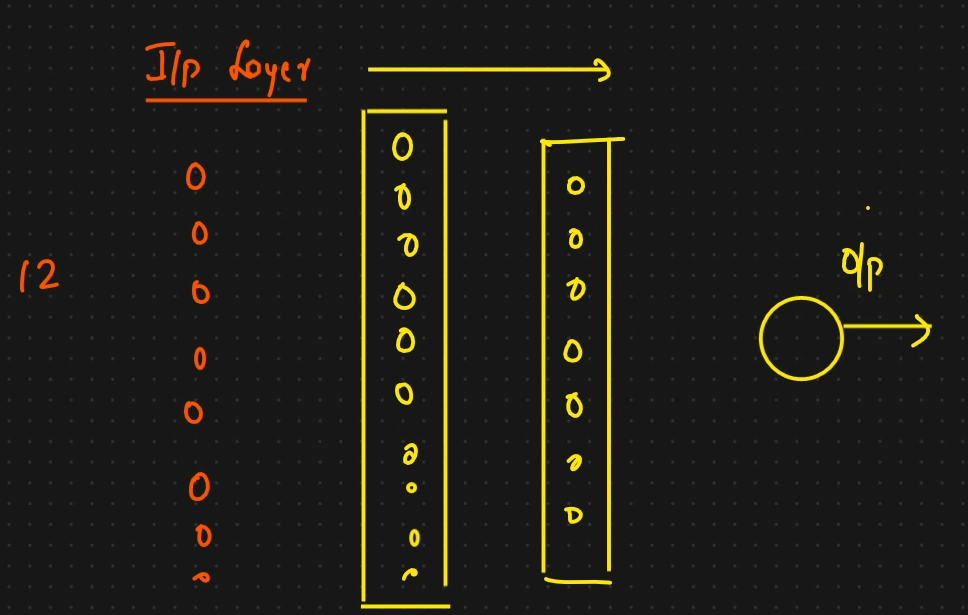

In [58]:
# There are 12 inputs, we are taking 3 dense layer, first hidden layer will be input layer, 2nd layer will be hidden layer with 32 neurons and last hidden layer will be our output layer
from IPython import display
display.Image("images/ann-implementation-with-dense.png", width=500)

### Understanding Input vs Dense Layers

The `Input` layer is not a computational layer with neurons - it's just a placeholder that defines the shape of your input data. It doesn't have weights, activations, or neurons. It simply tells Keras what dimensions to expect.

The method `def build_binary_classification_model(input_dim: int) -> Sequential:`

`-> Sequential` **does not enforce** the return type at runtime—it is purely a **type hint** to help:  

1️⃣ **Developers** → Understand the function’s expected return type.  
2️⃣ **IDEs & Linters** → Provide auto-completion and type-checking warnings.  
3️⃣ **Static Type Checkers (e.g., MyPy)** → Catch mismatches before execution.  
4️⃣ **Compilers (like JIT in PyPy or PEP 563 Future Annotations)** → Potentially use this information for optimizations in some implementations.


In [59]:
# Build our own model
# Sequential- means we know the each layer will be connected together
# for the very first input layer we need 'input_shape' as this will initally connected to the newural network
# There are 12 inputs, we are taking 3 dense layer, first hidden layer will be input layer, 2nd layer will be hidden layer with 32 neurons and
# last hidden layer will be our output layer

def build_binary_classification_model(input_dim: int) -> Sequential:
    """
    Builds a binary classification neural network model with three layers.
    
    Args:
        input_dim (int): The number of input features.
    
    Returns:
        Sequential: A Sequential model with the following architecture:
            - Input layer: Matching the input dimension
            - First hidden layer: 64 neurons with ReLU activation
            - Second hidden layer: 32 neurons with ReLU activation
            - Output layer: 1 neuron with sigmoid activation for binary classification
    """
    
    model = Sequential()
    # Add an Input layer as the first layer
    model.add(Input(shape=(input_dim,)))
    
    # Add hidden and output layers
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    
    return model

# Create the model using our input dimension
model = build_binary_classification_model(X_train.shape[1])

In [60]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,945 (11.50 KB)

 Trainable params: 2,945 (11.50 KB)

 Non-trainable params: 0 (0.00 B)

**Keras Sequential model summary**, which provides details about the **layers, output shapes, and trainable parameters** of your neural network.

---

### **1️⃣ Model Name**
🔹 **Model: "sequential_5"**  
This means it’s the **5th instance** of a `Sequential` model created in your session.

---

### **2️⃣ Layer Breakdown**

| Layer Name | Type | Output Shape | Parameters |
|------------|------|-------------|------------|
| **dense_15** | Dense (Fully Connected) | (None, 64) | 832 |
| **dense_16** | Dense (Fully Connected) | (None, 32) | 2,080 |
| **dense_17** | Dense (Fully Connected) | (None, 1) | 33 |

Let’s analyze each layer:

#### **🔹 Layer 1: `dense_15` (Input & First Hidden Layer)**
- **Type:** Dense (Fully Connected)
- **Output Shape:** `(None, 64)`
- **Parameters:** `832`
- **Calculation of Parameters:**  
  \[
  \text{Parameters} = (\text{input neurons} \times \text{output neurons}) + \text{bias}
  \]
  \[
  (input\_size \times 64) + 64 = 832
  \]
  ✅ This suggests that the input layer has **12 neurons** (as \( 12 \times 64 + 64 = 832 \)).

---

#### **🔹 Layer 2: `dense_16` (Second Hidden Layer)**
- **Type:** Dense (Fully Connected)
- **Output Shape:** `(None, 32)`
- **Parameters:** `2,080`
- **Calculation:**  
  \[
  (64 \times 32) + 32 = 2,080
  \]

---

#### **🔹 Layer 3: `dense_17` (Output Layer)**
- **Type:** Dense (Fully Connected)
- **Output Shape:** `(None, 1)` (for Binary Classification)
- **Parameters:** `33`
- **Calculation:**  
  \[
  (32 \times 1) + 1 = 33
  \]
  ✅ The `1` neuron indicates **binary classification** (probably using `sigmoid` activation).

---

### **3️⃣ Total Parameters**
🔹 **Trainable Parameters:** 2,945 (All parameters can be updated during training).  
🔹 **Non-Trainable Parameters:** 0 (No frozen layers).

---

### **4️⃣ Final Interpretation**
- The **input size is inferred as 12**.
- The model consists of **two hidden layers** (64 and 32 neurons) and **one output layer** (1 neuron).
- It’s likely built for **binary classification**.
- Uses **fully connected (Dense) layers**.

## Compiling the model

In [61]:
import tensorflow
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.01)
loss = tensorflow.keras.losses.BinaryCrossentropy()
loss

<LossFunctionWrapper(<function binary_crossentropy at 0x000001FD1BDCD120>, kwargs={'from_logits': False, 'label_smoothing': 0.0, 'axis': -1})>

In [62]:
# compile the model
model.compile(optimizer=opt, loss=loss, metrics=['accuracy'])

In [63]:
# Set up TensorBoard for logging training metrics and visualizations
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

# Directory where TensorBoard logs will be saved
log_dir = 'logs/fit'
# Enable histogram logging for visualizing layer activations
tensorflow_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

In [64]:
# Set up early stopping to monitor validation loss and stop training when it stops improving
# - monitor='val_loss': Monitor the validation loss during training
# - mode='min': Stop when the validation loss reaches its minimum
# - verbose=1: Print messages when early stopping is triggered
# - patience=25: Allow up to 25 epochs without improvement before stopping
# - restore_best_weights=True: Restore the model weights from the epoch with the best validation loss
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25, restore_best_weights=True)

In [65]:
# Train the model using the training data and validate it on the test data
# - epochs=100: Train the model for up to 100 epochs
# - validation_data=(X_test, Y_test): Use the test data for validation during training
# - verbose=1: Display detailed training progress
# - callbacks=[early_stop, tensorflow_callback]: Use early stopping to prevent overfitting and TensorBoard for logging
history=model.fit(
    x=X_train, 
    y=Y_train, 
    epochs=100, 
    validation_data=(X_test, Y_test), 
    verbose=1, 
    callbacks=[early_stop, tensorflow_callback])

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8166 - loss: 0.4484 - val_accuracy: 0.8540 - val_loss: 0.3535
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8591 - loss: 0.3498 - val_accuracy: 0.8465 - val_loss: 0.3565
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8577 - loss: 0.3486 - val_accuracy: 0.8555 - val_loss: 0.3531
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8591 - loss: 0.3446 - val_accuracy: 0.8595 - val_loss: 0.3444
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8581 - loss: 0.3434 - val_accuracy: 0.8575 - val_loss: 0.3454
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8591 - loss: 0.3409 - val_accuracy: 0.8630 - val_loss: 0.3498
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8609 - loss: 0.3356 - val_accuracy: 0.8555 - val_loss: 0.3468
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8630 - loss: 0.3264 - val_accu

In [66]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Ensure Y_test is binary
Y_test_binary = (Y_test > 0.5).astype(int)  # Convert continuous Y_test to binary if needed

# Predict the classes for the test data
Y_pred = (model.predict(X_test) > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate the classification report
report = classification_report(Y_test_binary, Y_pred, target_names=['Not Exited', 'Exited'])
print(report)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step
              precision    recall  f1-score   support

  Not Exited       0.87      0.97      0.92      1607
      Exited       0.77      0.41      0.53       393

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000



In [67]:
score = accuracy_score(Y_test, Y_pred)
print('Score:', score)
print('Score in pcnt:', score * 100, '%')
cm = confusion_matrix(Y_test, Y_pred)
print('Confusion Matrix: \n',cm)

Score: 0.8595
Score in pcnt: 85.95 %
Confusion Matrix: 
 [[1559   48]
 [ 233  160]]


In [68]:
model.save('my_model.keras')

In [69]:
## Load tensorboard extension
%load_ext tensorboard
%tensorboard --logdir logs/fit

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 9624), started 6:52:17 ago. (Use '!kill 9624' to kill it.)

#The `experiments.ipynb` file is a comprehensive workflow for building and training a binary classification model using a dataset related to customer churn prediction. Here's a summary of its key steps:

---

### **1️⃣ Data Preparation**
- **Import Libraries**: Essential libraries like `pandas`, `sklearn`, and `tensorflow` are imported.
- **Load Dataset**: The dataset (`Churn_Modelling.csv`) is loaded into a DataFrame (`df_main`).
- **Preprocessing**:
    - Unnecessary columns (`RowNumber`, `CustomerId`, `Surname`) are dropped.
    - Categorical columns (`Gender` and `Geography`) are encoded:
        - `Gender` is label-encoded.
        - `Geography` is one-hot encoded and concatenated back to the DataFrame.
    - The target variable (`Exited`) is separated from the features.

---

### **2️⃣ Feature Scaling**
- The features are scaled using `StandardScaler` to normalize the data for better model performance.

---

### **3️⃣ Model Building**
- **Neural Network Architecture**:
    - A `Sequential` model is created with:
        - Input layer: 12 features.
        - Hidden layers: Two dense layers with 64 and 32 neurons, using ReLU activation.
        - Output layer: A single neuron with sigmoid activation for binary classification.
- **Compilation**:
    - Optimizer: Adam with a learning rate of 0.01.
    - Loss Function: Binary Crossentropy.
    - Metric: Accuracy.

---

### **4️⃣ Training**
- The model is trained using:
    - Training data (`X_train`, `Y_train`) and validation data (`X_test`, `Y_test`).
    - Early stopping to prevent overfitting (monitors `val_loss` with patience of 25 epochs).
    - TensorBoard for logging and visualization.

---

### **5️⃣ Saving and Logging**
- The trained model is saved as `my_model.keras`.
- Encoders (`label_encoder_gender` and `ohe_geography`) and the scaler are serialized using `pickle` for future use.
- TensorBoard logs are stored in the `logs/fit` directory for visualization.

---

### **6️⃣ Visualization**
- TensorBoard is used to visualize training metrics like loss and accuracy.

---

### **Purpose**
The notebook demonstrates a complete machine learning pipeline for predicting customer churn using a neural network. It includes data preprocessing, model building, training, evaluation, and saving artifacts for deployment or further analysis.